In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns; sns.set(style="ticks", color_codes=True)
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
from sklearn import preprocessing

pd.set_option('display.float_format', lambda x: '%.4f' % x)

In [2]:
dfBase = pd.read_csv('https://raw.githubusercontent.com/benvictoria17/DataAnalytics/master/dataset/Ethereum%20Historical%20Data/EthereumBlockDifficultyGrowth.csv')
dfBase.rename(index=str, columns={'Value': 'Difficulty', 'Date(UTC)': 'Date_UTC'}, inplace=True)

In [3]:
dfBase = dfBase.assign(BlockRewards=pd.Series(pd.read_csv('https://raw.githubusercontent.com/benvictoria17/DataAnalytics/master/dataset/Ethereum%20Historical%20Data/EthereumBlockRewardsChart.csv')['Value']).values)
dfBase = dfBase.assign(BlockSize=pd.Series(pd.read_csv('https://raw.githubusercontent.com/benvictoria17/DataAnalytics/master/dataset/Ethereum%20Historical%20Data/EthereumBlockSizeHistory.csv')['Value']).values)
dfBase = dfBase.assign(HashRate=pd.Series(pd.read_csv('https://raw.githubusercontent.com/benvictoria17/DataAnalytics/master/dataset/Ethereum%20Historical%20Data/EthereumNetworkHashRateGrowthRate.csv')['Value']).values)
dfBase = dfBase.assign(TotalTransactionFee=pd.Series(pd.read_csv('https://raw.githubusercontent.com/benvictoria17/DataAnalytics/master/dataset/Ethereum%20Historical%20Data/EthereumTransactionFee.csv')['Value']).values)
dfBase = dfBase.assign(TransactionCount=pd.Series(pd.read_csv('https://raw.githubusercontent.com/benvictoria17/DataAnalytics/master/dataset/Ethereum%20Historical%20Data/EthereumTransactionHistory.csv')['Value']).values)
dfBase = dfBase.assign(MarketCap=pd.Series(pd.read_csv('https://raw.githubusercontent.com/benvictoria17/DataAnalytics/master/dataset/Ethereum%20Historical%20Data/EtherMarketCapChart.csv')['MarketCap']).values)
dfBase = dfBase.assign(PricePerUnit=pd.Series(pd.read_csv('https://raw.githubusercontent.com/benvictoria17/DataAnalytics/master/dataset/Ethereum%20Historical%20Data/EtherMarketCapChart.csv')['Price']).values)
dfBase = dfBase.assign(SupplyOfCoins=pd.Series(pd.read_csv('https://raw.githubusercontent.com/benvictoria17/DataAnalytics/master/dataset/Ethereum%20Historical%20Data/EtherMarketCapChart.csv')['Supply']).values)
dfBase = dfBase.assign(DailyGasUsage=pd.Series(pd.read_csv('https://raw.githubusercontent.com/benvictoria17/DataAnalytics/master/dataset/Ethereum%20Historical%20Data/EthereumDailyGasUsedHistory.csv')['Value']).values)
dfBase = dfBase.assign(GasPrice=pd.Series(pd.read_csv('https://raw.githubusercontent.com/benvictoria17/DataAnalytics/master/dataset/Ethereum%20Historical%20Data/EthereumGasPriceHistory.csv')['Value']).values)

In [4]:
dfBase.TotalTransactionFee = pd.to_numeric(dfBase.TotalTransactionFee.str.pad(dfBase.TotalTransactionFee.str.len().max(), 'left', '0').str.slice(0,18,1)) / (10**14)
dfBase.GasPrice = dfBase.GasPrice / (10**9)
dfBase.PricePerUnit = pd.to_numeric(dfBase.PricePerUnit.str.replace(',',''))

In [5]:
dfBase

,Date_UTC,UnixTimeStamp,Difficulty,BlockRewards,BlockSize,HashRate,TotalTransactionFee,TransactionCount,MarketCap,PricePerUnit,SupplyOfCoins,DailyGasUsage,GasPrice
0,7/30/2015,1438214400,0.1210,39316.0938,644,11.5297,0.0000,8893,0.0000,0.0000,72049306.5938,0,0.0000
1,7/31/2015,1438300800,0.6030,36191.7188,582,51.4594,0.0000,0,0.0000,0.0000,72085498.3125,0,0.0000
2,8/1/2015,1438387200,0.8870,27705.9375,575,57.7845,0.0000,0,0.0000,0.0000,72113204.2500,0,0.0000
3,8/2/2015,1438473600,1.0200,28223.4375,581,67.9224,0.0000,0,0.0000,0.0000,72141427.6875,0,0.0000
4,8/3/2015,1438560000,1.1260,27976.7188,587,74.5737,0.0000,0,0.0000,0.0000,72169404.4062,0,0.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1159,10/1/2018,1538352000,3240.6530,20302.4062,24593,259027.1628,611.8069,476308,23622.2254,230.8900,102309434.8438,38550173670,18.9410
1160,10/2/2018,1538438400,3211.9250,20514.1875,24107,259556.2604,646.2651,490262,23066.1938,225.4100,102329949.0312,39210756138,19.0349
1161,10/3/2018,1538524800,3226.0850,20295.4688,21423,258086.8149,444.7258,559006,22513.9833,219.9700,102350244.5000,40441198221,13.2487
1162,10/4/2018,1538611200,3261.7530,20369.6250,22655,261317.7945,441.2275,559181,22701.7074,221.7600,102370614.1250,40791755826,13.2541


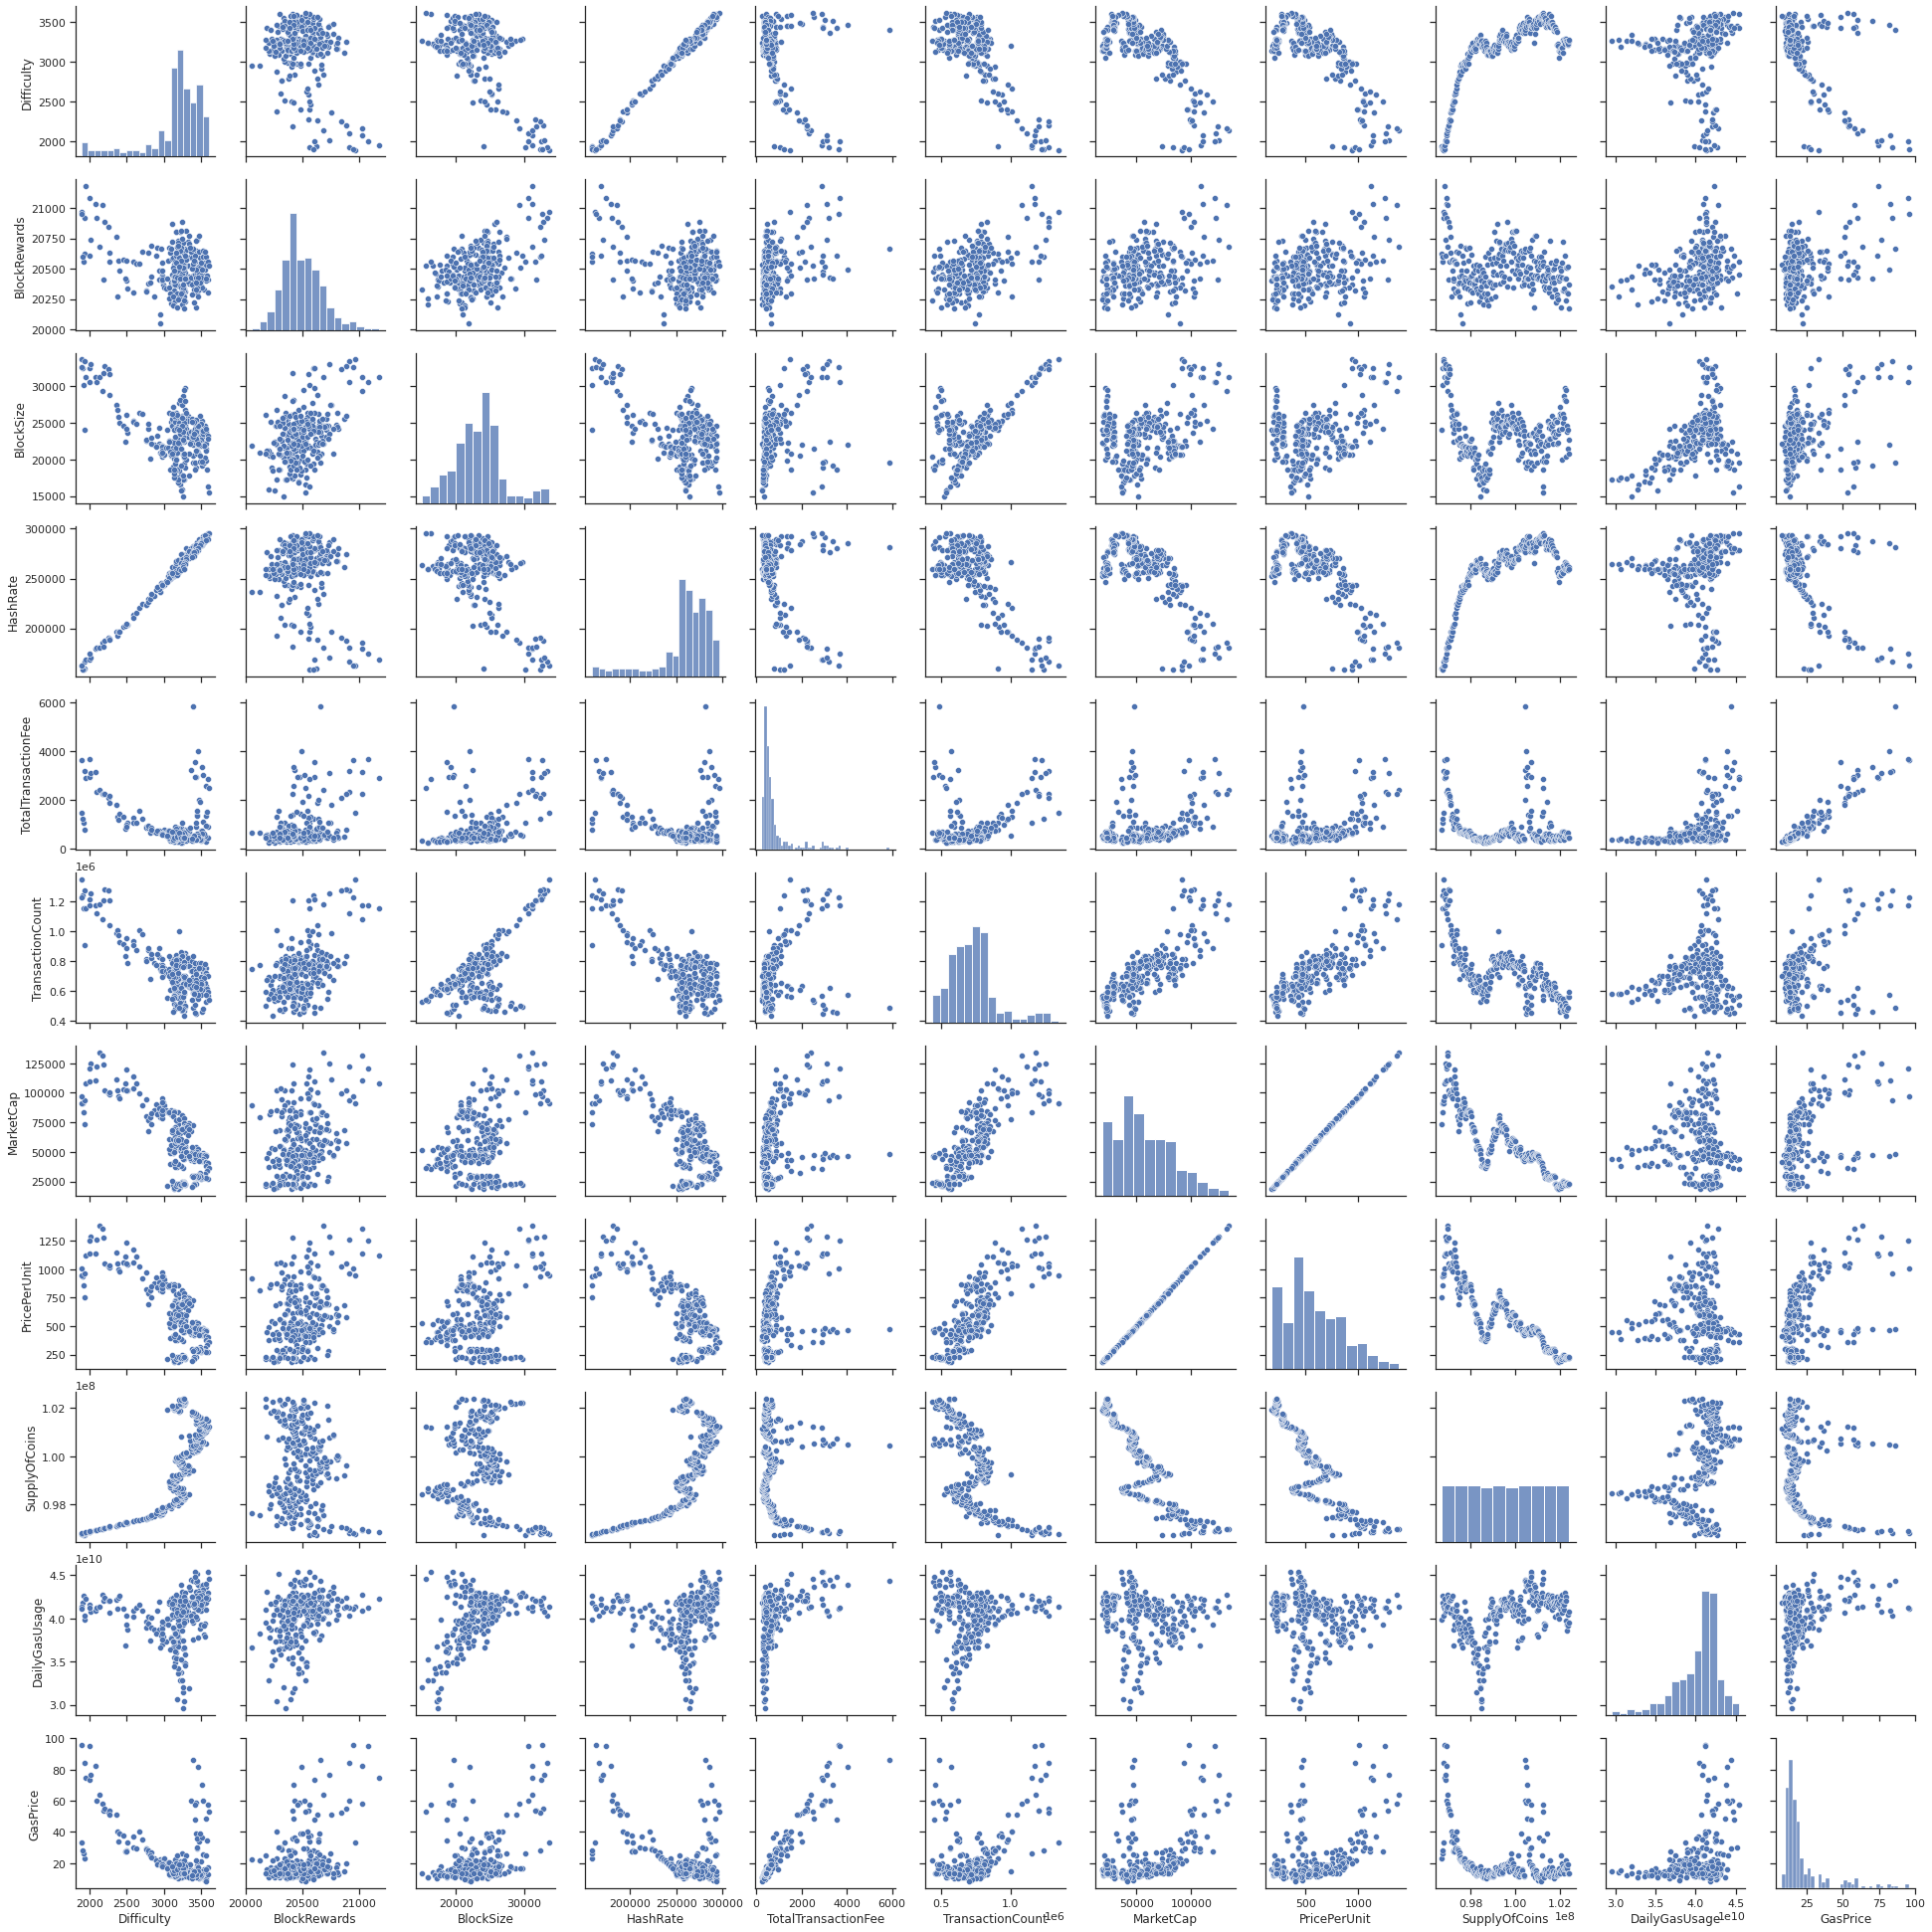

In [6]:
df_Recent_Data = dfBase[(dfBase.UnixTimeStamp >= 1514764800)].copy()
df_Recent_Data.drop(['UnixTimeStamp'], axis=1, inplace=True)
sns.pairplot(df_Recent_Data)

In [7]:
df_Recent_Data.corr('pearson')

,Difficulty,BlockRewards,BlockSize,HashRate,TotalTransactionFee,TransactionCount,MarketCap,PricePerUnit,SupplyOfCoins,DailyGasUsage,GasPrice
Difficulty,1.0000,-0.3577,-0.5523,0.9937,-0.4010,-0.7654,-0.7632,-0.7720,0.7399,0.0612,-0.5596
BlockRewards,-0.3577,1.0000,0.4687,-0.2643,0.3763,0.5188,0.3556,0.3523,-0.2043,0.3078,0.4067
BlockSize,-0.5523,0.4687,1.0000,-0.5177,0.2850,0.6698,0.3751,0.3748,-0.1057,0.4858,0.3826
HashRate,0.9937,-0.2643,-0.5177,1.0000,-0.3691,-0.7152,-0.7285,-0.7385,0.7232,0.0946,-0.5300
TotalTransactionFee,-0.4010,0.3763,0.2850,-0.3691,1.0000,0.3242,0.3568,0.3577,-0.2155,0.3887,0.9553
TransactionCount,-0.7654,0.5188,0.6698,-0.7152,0.3242,1.0000,0.8021,0.8024,-0.6765,0.1252,0.4575
MarketCap,-0.7632,0.3556,0.3751,-0.7285,0.3568,0.8021,1.0000,0.9998,-0.8753,-0.0737,0.4823
PricePerUnit,-0.7720,0.3523,0.3748,-0.7385,0.3577,0.8024,0.9998,1.0000,-0.8801,-0.0808,0.4851
SupplyOfCoins,0.7399,-0.2043,-0.1057,0.7232,-0.2155,-0.6765,-0.8753,-0.8801,1.0000,0.4023,-0.3413
DailyGasUsage,0.0612,0.3078,0.4858,0.0946,0.3887,0.1252,-0.0737,-0.0808,0.4023,1.0000,0.3073


In [8]:
df_Recent_Normalized = df_Recent_Data.copy()
df_Recent_Normalized.set_index('Date_UTC', inplace=True)
min_max_scaler = preprocessing.MinMaxScaler()
df_Recent_Normalized[df_Recent_Normalized.columns] = min_max_scaler.fit_transform(df_Recent_Normalized[df_Recent_Normalized.columns])

In [9]:
df_Recent_Normalized = df_Recent_Data.copy()
df_Recent_Normalized.set_index('Date_UTC', inplace=True)
min_max_scaler = preprocessing.MinMaxScaler()
df_Recent_Normalized[df_Recent_Normalized.columns] = min_max_scaler.fit_transform(df_Recent_Normalized[df_Recent_Normalized.columns])

In [10]:
df_Recent_Normalized

,Difficulty,BlockRewards,BlockSize,HashRate,TotalTransactionFee,TransactionCount,MarketCap,PricePerUnit,SupplyOfCoins,DailyGasUsage,GasPrice
Date_UTC,,,,,,,,,,,
1/1/2018,0.0232,0.5054,0.4836,0.0046,0.0936,0.5184,0.4711,0.4769,0.0000,0.6512,0.1737
1/2/2018,0.0171,0.4518,0.8115,0.0018,0.1442,0.7860,0.5597,0.5648,0.0036,0.8279,0.2080
1/3/2018,0.0052,0.4858,0.9354,0.0000,0.1775,0.8778,0.6261,0.6307,0.0072,0.7725,0.2263
1/4/2018,0.0000,0.8116,1.0000,0.0268,0.2208,1.0000,0.6294,0.6338,0.0109,0.7433,0.2883
1/5/2018,0.0220,0.7662,0.9858,0.0553,0.5228,0.9145,0.6482,0.6523,0.0146,0.6830,0.8709
...,...,...,...,...,...,...,...,...,...,...,...
10/1/2018,0.7864,0.2220,0.5140,0.7310,0.0657,0.0459,0.0430,0.0398,0.9857,0.5673,0.1239
10/2/2018,0.7696,0.4102,0.4880,0.7348,0.0718,0.0611,0.0381,0.0353,0.9893,0.6091,0.1250
10/3/2018,0.7779,0.2158,0.3445,0.7241,0.0359,0.1362,0.0334,0.0307,0.9929,0.6869,0.0590


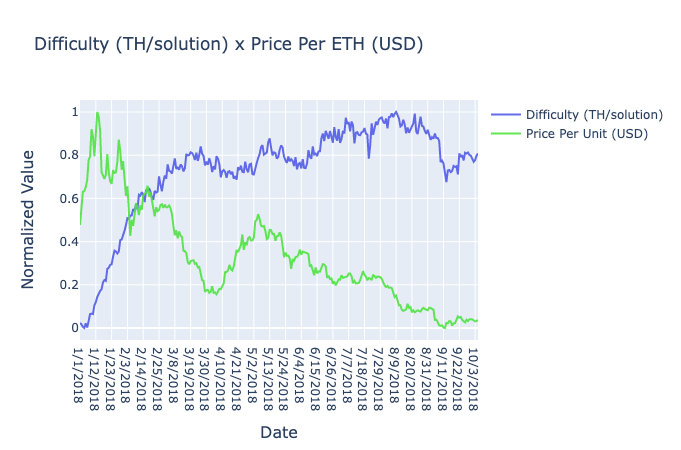

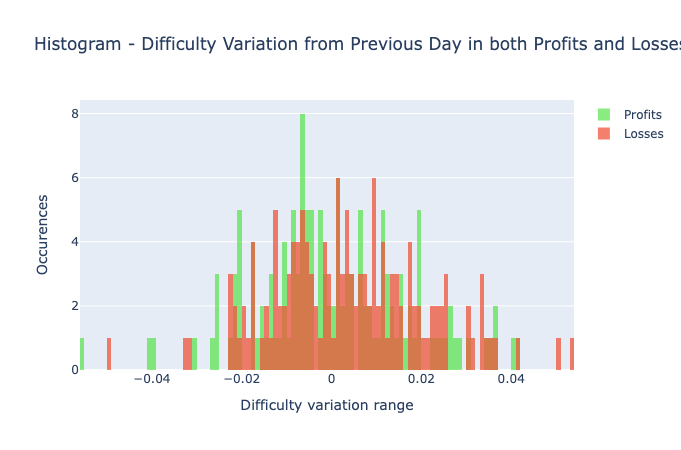

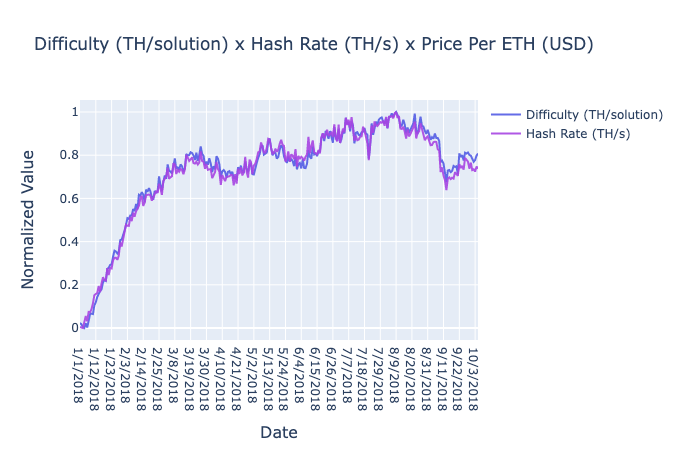

In [11]:
traceDifficulty = go.Scatter(
                x = df_Recent_Normalized.index,
                y = df_Recent_Normalized.Difficulty,
                name = 'Difficulty (TH/solution)',
                marker = dict(color = 'rgba(84, 92, 229, 0.9)', line=dict(color='rgb(0,0,0)',width=1.5)))

tracePricePerUnit = go.Scatter(
                x = df_Recent_Normalized.index,
                y = df_Recent_Normalized.PricePerUnit,
                name = 'Price Per Unit (USD)',
                mode = 'lines',
                marker = dict(color = 'rgba(82, 227, 68, 0.9)', line=dict(color='rgb(0,0,0)',width=0)))

layout = go.Layout(
    title='Difficulty (TH/solution) x Price Per ETH (USD)',
    xaxis=dict(
        title='Date',
        titlefont=dict(
            size=16
        )
    ),
    yaxis=dict(
        title='Normalized Value',
        titlefont=dict(
            size=16
        )
    )
)

py.iplot(go.Figure(data = [traceDifficulty,tracePricePerUnit], layout=layout))
dfDiffPrice =  df_Recent_Data[['Date_UTC', 'Difficulty', 'PricePerUnit']]
dfDiffPrice.set_index('Date_UTC', inplace=True)
dfDiffPrice = dfDiffPrice.pct_change()

dfProfit = dfDiffPrice[(dfDiffPrice.PricePerUnit >= 0)]
dfLoss = dfDiffPrice[(dfDiffPrice.PricePerUnit <= 0)]

dataProfit = go.Histogram(
    x=dfProfit.Difficulty, 
    nbinsx = 100,
    opacity=0.75,
    name='Profits',
    marker=dict(
        color='rgba(82, 227, 68, 0.9)',
    )
)

dataLoss = go.Histogram(
    x=dfLoss.Difficulty, 
    nbinsx = 110,
    opacity=0.75,
    name='Losses',
    marker=dict(
        color='rgba(227, 68, 68)',
    )
)

layout = go.Layout(
    title='Histogram - Difficulty Variation from Previous Day in both Profits and Losses',
    xaxis=dict(
        title='Difficulty variation range'
    ),
    yaxis=dict(
        title='Occurences'
    ),
    bargap=0,
    bargroupgap=0,
    barmode='overlay'
)

fig = go.Figure(
    data=[dataProfit, dataLoss], 
    layout=layout
)
py.iplot(fig)
traceDifficulty = go.Scatter(
                x = df_Recent_Normalized.index,
                y = df_Recent_Normalized.Difficulty,
                name = 'Difficulty (TH/solution)',
                marker = dict(color = 'rgba(84, 92, 229, 0.9)', line=dict(color='rgb(0,0,0)',width=1.5)))

traceHashRate = go.Scatter(
                x = df_Recent_Normalized.index,
                y = df_Recent_Normalized.HashRate,
                name = 'Hash Rate (TH/s)',
                mode = 'lines',
                marker = dict(color = 'rgba(168, 69, 227, 0.9)', line=dict(color='rgb(0,0,0)',width=0)))

layout = go.Layout(
    title='Difficulty (TH/solution) x Hash Rate (TH/s) x Price Per ETH (USD)',
    xaxis=dict(
        title='Date',
        titlefont=dict(
            size=16
        )
    ),
    yaxis=dict(
        title='Normalized Value',
        titlefont=dict(
            size=16
        )
    )
)

py.iplot(go.Figure(data = [traceDifficulty,traceHashRate], layout=layout))

In [12]:
dfSupply =  df_Recent_Data[['Date_UTC', 'SupplyOfCoins']]
dfSupply.set_index('Date_UTC', inplace=True)
dfSupply.pct_change()

,SupplyOfCoins
Date_UTC,
1/1/2018,NaN
1/2/2018,0.0002
1/3/2018,0.0002
1/4/2018,0.0002
1/5/2018,0.0002
...,...
10/1/2018,0.0002
10/2/2018,0.0002
10/3/2018,0.0002


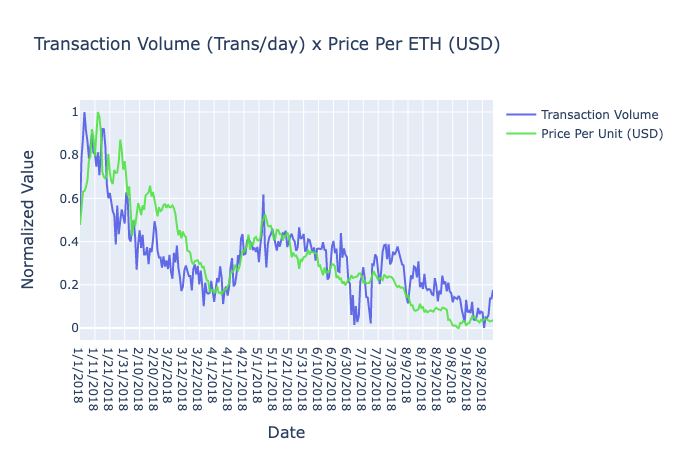

In [13]:
traceTransactionCount = go.Scatter(
                x = df_Recent_Normalized.index,
                y = df_Recent_Normalized.TransactionCount,
                name = 'Transaction Volume',
                marker = dict(color = 'rgba(84, 92, 229, 0.9)', line=dict(color='rgb(0,0,0)',width=1.5)))

tracePricePerUnit = go.Scatter(
                x = df_Recent_Normalized.index,
                y = df_Recent_Normalized.PricePerUnit,
                name = 'Price Per Unit (USD)',
                mode = 'lines',
                marker = dict(color = 'rgba(82, 227, 68, 0.9)', line=dict(color='rgb(0,0,0)',width=0)))

layout = go.Layout(
    title='Transaction Volume (Trans/day) x Price Per ETH (USD)',
    xaxis=dict(
        title='Date',
        titlefont=dict(
            size=16
        )
    ),
    yaxis=dict(
        title='Normalized Value',
        titlefont=dict(
            size=16
        )
    )
)

py.iplot(go.Figure(data = [traceTransactionCount, tracePricePerUnit], layout=layout))